In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import io

Let us upload our Dataset and start working on it

In [7]:
from google.colab import files
dataset = files.upload()

Saving IRIS Flower.csv to IRIS Flower (1).csv


Read it in pandas frame format making it easier to work on it

In [17]:
data = pd.read_csv(io.BytesIO(dataset['IRIS Flower (1).csv']))

In [18]:
print(data)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


First we will check the dataset

Let us check if any entries are 0 or not.




In [19]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Let us check if we have any duplicate datasets or not, if yes we can drop them as they are redundant.

In [20]:
data.drop_duplicates(inplace=True)

In [22]:
data.shape

(147, 5)

Looks like we had 2 duplicates, which was dropped.


In [26]:
species=data['species'].value_counts()

In [27]:
species

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

In [28]:
sepal_l=data['sepal_length'].value_counts()

In [29]:
sepal_l

sepal_length
5.0    10
5.1     9
6.3     9
6.7     8
5.7     8
5.5     7
6.4     7
5.8     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
4.9     4
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: count, dtype: int64

No need to check other rows value counts.

Let us plot and check the species

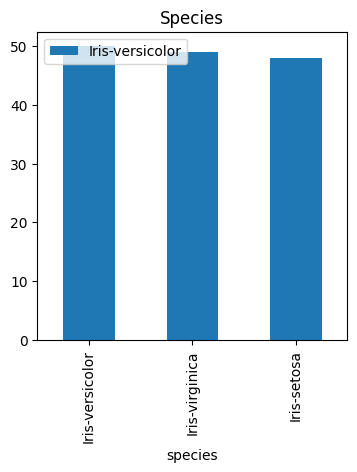

In [35]:
plt.figure(figsize=(4,4))
species.plot(kind='bar')
plt.title('Species')
plt.legend(loc='upper left', labels=species.index)
plt.show()

We can do better and plot a pie chart

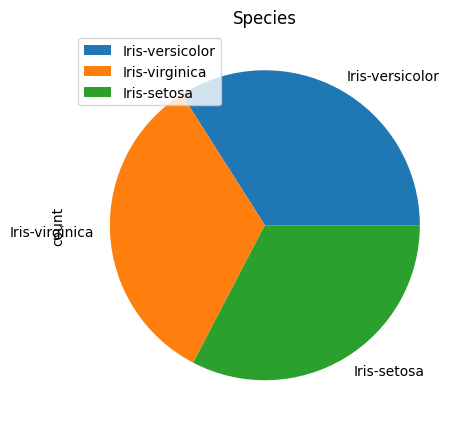

In [38]:
plt.figure(figsize=(4,4))
species.plot(kind='pie')
plt.title('Species')
plt.legend(loc='upper left', labels=species.index)
plt.show()

Now let us train our model, based on the data we have collected


In [39]:
x=data.drop('species',axis=1)

In [40]:
y=data['species']

Now that we have seperated our training input and output, let us split them and train our model


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

We will use here 2 models to train our dataset and check the accuracy on that.

In [54]:
model1=LogisticRegression(max_iter=20)

In [55]:
model1.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=20)

In [56]:
y_predict=model1.predict(x_test)

In [57]:
print(y_predict)

['Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa']


In [58]:
acc=accuracy_score(y_predict,y_test)
print(acc)

0.9333333333333333


Let us use our model 2


In [59]:
model2=KNeighborsClassifier(n_neighbors=3)

In [60]:
model2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [61]:
y_predict2=model2.predict(x_test)

In [63]:
acc1=accuracy_score(y_predict2,y_test)
print(acc1)

0.9333333333333333


In [64]:
import numpy as np
if acc > acc1:
  model = model1
else:
  model = model2
data_point = np.array([[5.5, 3.8, 1.7, 0.4]])
predicted_species = model.predict(data_point)
print(predicted_species)

['Iris-setosa']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
